In [9]:
"""
Created on Mon Jan  6 01:40:03 2020

@author: OZGUR
"""

'\nCreated on Mon Jan  6 01:40:03 2020\n\n@author: OZGUR\n'

In [10]:
from numpy import genfromtxt, ones
import numpy as np
from matplotlib import pyplot as plt 

In [11]:
def computeCost(X_ii, y, theta):
    m = len(y)
    J = 0
      
    Hx = X_ii.dot(theta)
    J = sum((Hx-y)**2)/(2*m)
    
    return J

In [12]:
def gradientDescent(X_ii, y, theta, alpha, num_iters):

    m = len(y)
    J_history = np.zeros(num_iters)
    
    for iter in range(0, len(J_history)):
        
        theta = theta - (alpha * (X_ii.transpose() * ((X_ii.dot(theta)-y)/m))).sum(axis = 1)
        
        J_history[iter] = computeCost(X_ii, y, theta)  
    
    return [theta, J_history]

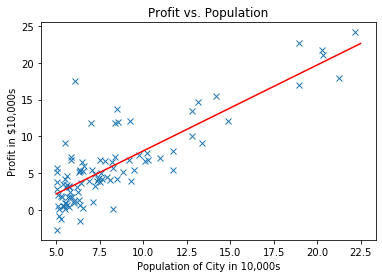

theta =  [-3.63029144  1.16636235]


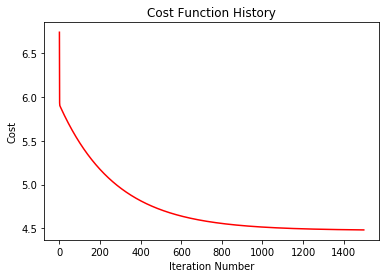

J_history =  [6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


In [13]:
data = genfromtxt('ex1data1.txt', delimiter=',')
X=data[:,0]
y=data[:,1]
theta = [0, 0]
num_iters = 1500
alpha = 0.01
m = len(y)
X_ii = np.column_stack((np.ones(m), X))
J_historyX = list(range(0, 1500))
    
plt.figure()
plt.plot(X,y,'x',linewidth=0)
plt.title('Profit vs. Population')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
    
theta, J_history = gradientDescent(X_ii, y, theta, alpha, num_iters)
     
x = np.linspace(5.0,22.5, 50)
y = x*theta[1]+theta[0]
plt.plot(x, y, '-r', label='y=2x+1')
plt.show()
print("theta = ", theta)
       
plt.figure()
plt.plot(J_historyX, J_history,'r-')
plt.title('Cost Function History')
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.show()
print("J_history = " , J_history)

In [14]:
# Visualizing J(theta_0, theta_1):
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);
# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)), dtype=float)
J_vals

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
data = genfromtxt('ex1data1.txt', delimiter=',')
X=data[:,0]
y=data[:,1]
X_ii = np.column_stack((np.ones(m), X))

# Visualizing J(theta_0, theta_1):
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);
#print(theta0_vals)
#print(theta1_vals)
X_ii = np.column_stack((np.ones(m), X))

# Fill out J_vals
for i in  range(0,len(theta0_vals)):
    for j in range(0,len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i,j] = computeCost(X_ii, y, t)

J_vals

array([[328.09290555, 316.6648683 , 305.44447299, ..., 186.35412584,
        195.06735595, 203.98822799],
       [323.26504192, 311.92025945, 300.7831189 , ..., 189.60197489,
        198.39845977, 207.40258658],
       [318.47799046, 307.21646275, 296.16257698, ..., 192.89063611,
        201.77037576, 210.85775734],
       ...,
       [ 49.81156018,  46.45923561,  43.31455298, ..., 691.41691065,
        708.20585345, 725.20243817],
       [ 48.94247627,  45.67340647,  42.61197861, ..., 698.62353943,
        715.49573699, 732.57557648],
       [ 48.11420452,  44.9283895 ,  41.95021641, ..., 705.87098036,
        722.82643269, 739.98952696]])

Text(0.5, 0, 'Cost')

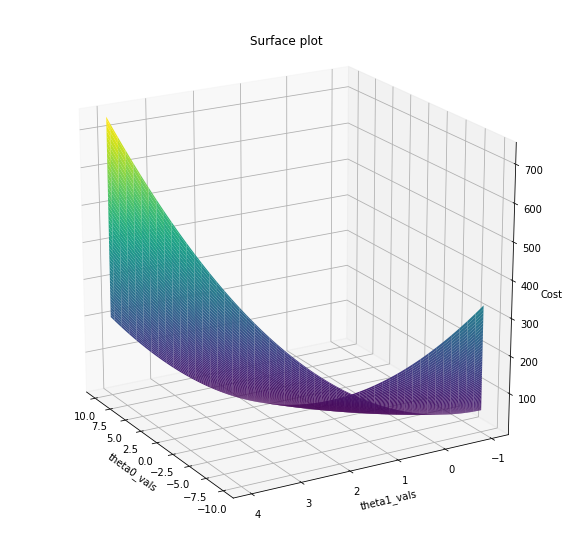

In [16]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = theta0_vals
y = theta1_vals
z = J_vals

#fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.view_init(elev=20., azim=150.0)
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.set_xlabel('theta0_vals')
ax.set_ylabel('theta1_vals')
ax.set_zlabel('Cost')

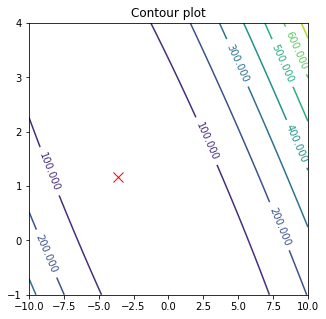

In [17]:
fig, ax = plt.subplots(figsize=(5,5))

x = theta0_vals
y = theta1_vals
z = J_vals
CS = ax.contour(x, y, z)
ax.clabel(CS, inline=10, fontsize=10)
ax.margins(10, 10) 
ax.set_title('Contour plot')
plt.plot(theta[0], theta[1], marker='x', markersize=10, color="red")